In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/terre/Downloads/CSV_FILES/superbowl_commercials.csv")

In [3]:
df.head()

,Year,Brand,Superbowl Ads Link,Youtube Link,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,Youtube Likes,TV Viewers
0,2000,E-Trade,https://superbowl-ads.com/2000-etrade-monkey-d...,https://www.youtube.com/watch?v=Muyq2kMDFoA,True,True,False,False,False,True,False,30,2.1,13615.0,84.0,88.47
1,2000,E-Trade,https://superbowl-ads.com/2000-etrade-money-ou...,https://www.youtube.com/watch?v=oftjwYmlfoA,True,True,False,False,True,False,False,30,2.1,72772.0,146.0,88.47
2,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-whaas...,https://www.youtube.com/watch?v=loimTUjV92Q,True,True,False,False,False,False,False,30,2.1,5399.0,11.0,88.47
3,2000,Bud Light,https://superbowl-ads.com/2000-bud-light-hold-...,https://www.youtube.com/watch?v=M3IV93HwSkc,True,True,False,False,True,False,False,30,2.1,6699.0,8.0,88.47
4,2000,Budweiser,https://superbowl-ads.com/2000-budweiser-talki...,https://www.youtube.com/watch?v=dK1tlG778J8,True,False,False,False,False,True,False,30,2.1,18972.0,6.0,88.47


# Data cleaning

In [4]:
df.dtypes

Year                       int64
Brand                     object
Superbowl Ads Link        object
Youtube Link              object
Funny                       bool
Shows Product Quickly       bool
Patriotic                   bool
Celebrity                   bool
Danger                      bool
Animals                     bool
Uses Sex                    bool
Length                     int64
Estimated Cost           float64
Youtube Views            float64
Youtube Likes            float64
TV Viewers               float64
dtype: object

In [5]:
# Checking the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 249
Number of columns: 16


In [6]:
print(df.isnull().sum())

Year                      0
Brand                     0
Superbowl Ads Link        0
Youtube Link              9
Funny                     0
Shows Product Quickly     0
Patriotic                 0
Celebrity                 0
Danger                    0
Animals                   0
Uses Sex                  0
Length                    0
Estimated Cost            0
Youtube Views            12
Youtube Likes            18
TV Viewers                0
dtype: int64


In [7]:
df.drop(['Superbowl Ads Link', 'Youtube Link'], axis=1, inplace=True)

In [8]:
#filling the missing values with their mean
df["Youtube Views"].fillna(df["Youtube Views"].median(), inplace=True)
df["Youtube Likes"].fillna(df["Youtube Likes"].median(), inplace=True)

In [9]:
print(df.isnull().sum())

Year                     0
Brand                    0
Funny                    0
Shows Product Quickly    0
Patriotic                0
Celebrity                0
Danger                   0
Animals                  0
Uses Sex                 0
Length                   0
Estimated Cost           0
Youtube Views            0
Youtube Likes            0
TV Viewers               0
dtype: int64


In [10]:
print(df.duplicated().sum())

0


In [11]:
# Descriptive statistics of the numerical columns
print(df.describe())

              Year      Length  Estimated Cost  Youtube Views  Youtube Likes  \
count   249.000000  249.000000      249.000000   2.490000e+02     249.000000   
mean   2010.469880   44.457831        5.156888   1.496305e+06    4729.441432   
std       6.002024   21.331845        4.075974   1.200241e+07   27368.042515   
min    2000.000000   10.000000        0.980000   5.000000e+00       0.000000   
25%    2006.000000   30.000000        2.400000   8.062000e+03      28.000000   
50%    2010.000000   30.000000        3.150000   4.730900e+04     146.000000   
75%    2015.000000   60.000000        5.900000   1.796450e+05     590.000000   
max    2021.000000  180.000000       31.730000   1.814238e+08  295000.000000   

       TV Viewers  
count  249.000000  
mean   100.475341  
std     12.819811  
min     84.340000  
25%     90.750000  
50%     98.730000  
75%    111.010000  
max    232.000000  


In [12]:
df.drop(['Youtube Likes'], axis=1, inplace=True)

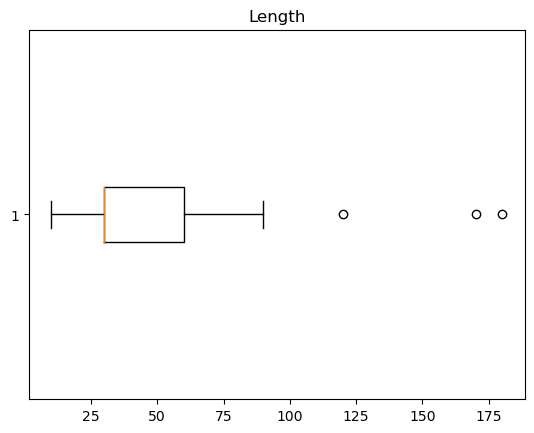

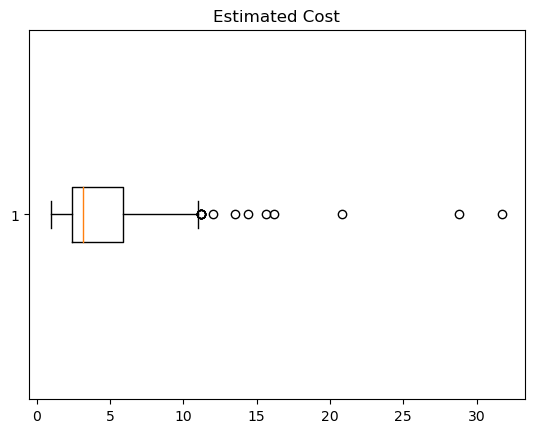

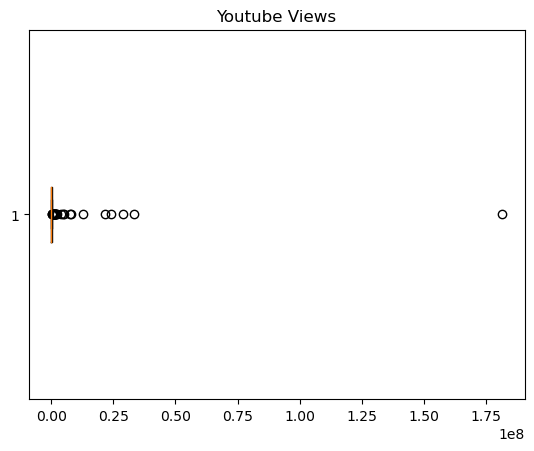

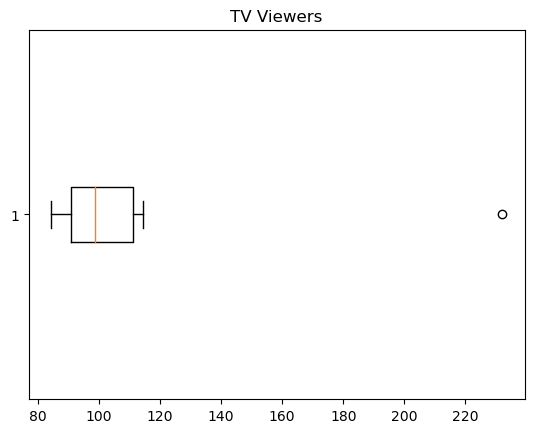

In [13]:
# Check for outliers
columns = ["Length", "Estimated Cost", "Youtube Views", "TV Viewers"]
for column in columns:
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

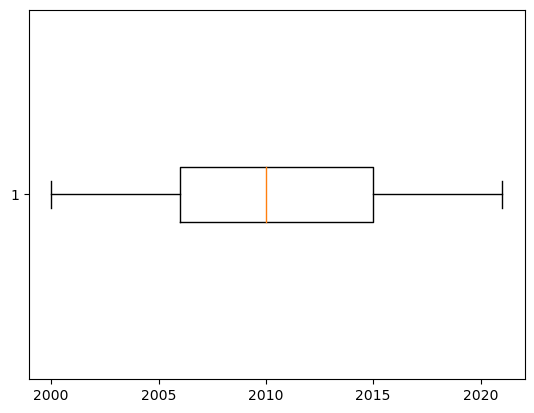

In [14]:
plt.boxplot(df["Year"], vert=False)
plt.show

This shows the presence of outliers in the columns as well as the distribution being positively skewed

we removed outliers from the "estimated_cost" column because it is the variable that has the most significant impact on the total cost of each commercial. If there are extreme values or outliers in this column, they can have a disproportionate effect on the calculated total cost. This could lead to inaccurate results when analyzing the data, particularly when comparing costs across different brands or years.

On the other hand, we chose to adjust the outliers in other columns such as "length" and "TV_viewers_millions" because they do not have as significant an impact on the analysis as "estimated_cost". Removing or imputing too many values from these columns could result in a significant loss of data, which could negatively impact the accuracy of any analysis. Therefore, we chose to adjust the outliers in these columns by replacing them with more reasonable values based on the characteristics of the data. This helps to ensure that the overall dataset is more balanced and reflects the true distribution of the underlying data.

In summary, the decision to remove or adjust outliers in a given column should depend on the specific characteristics of the data, the goals of the analysis, and the potential impact of the variable on the overall analysis.


In [15]:
df

,Year,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,TV Viewers
0,2000,E-Trade,True,True,False,False,False,True,False,30,2.1,13615.0,88.47
1,2000,E-Trade,True,True,False,False,True,False,False,30,2.1,72772.0,88.47
2,2000,Budweiser,True,True,False,False,False,False,False,30,2.1,5399.0,88.47
3,2000,Bud Light,True,True,False,False,True,False,False,30,2.1,6699.0,88.47
4,2000,Budweiser,True,False,False,False,False,True,False,30,2.1,18972.0,88.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2021,E-Trade,True,False,False,True,False,False,False,30,5.5,177.0,91.63
245,2021,Toyota,False,False,True,False,False,False,False,60,11.0,1399700.0,91.63
246,2021,Bud Light,True,True,False,True,True,False,False,60,11.0,4250.0,91.63
247,2021,Doritos,True,False,False,True,True,True,False,60,11.0,21546933.0,91.63


In [16]:
# Remove outliers
q1 = df["Estimated Cost"].quantile(0.25)
q3 = df["Estimated Cost"].quantile(0.75)
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr

df = df[df["Estimated Cost"] < outlier_threshold]

# Adjust outliers
df["Youtube Views"] = np.where(df["Youtube Views"] > 5000000, 5000000, df["Youtube Views"])
df["TV Viewers"] = np.where(df["TV Viewers"] > 10000000, 10000000, df["TV Viewers"])


C:\Users\terre\AppData\Local\Temp\ipykernel_13344\2509286012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Youtube Views"] = np.where(df["Youtube Views"] > 5000000, 5000000, df["Youtube Views"])
C:\Users\terre\AppData\Local\Temp\ipykernel_13344\2509286012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TV Viewers"] = np.where(df["TV Viewers"] > 10000000, 10000000, df["TV Viewers"])


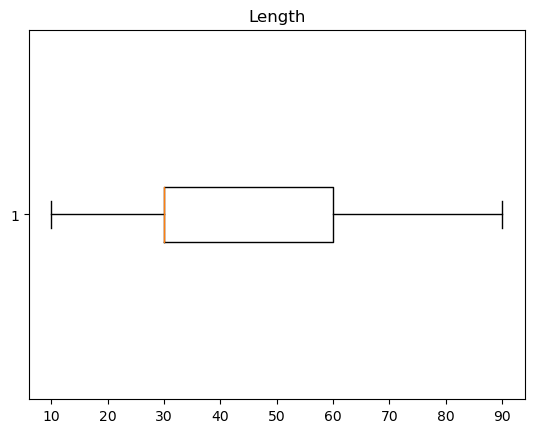

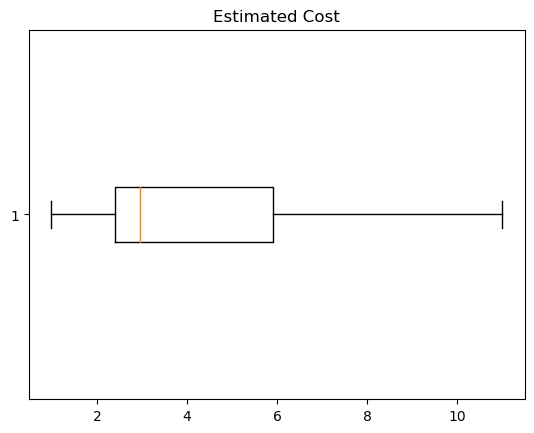

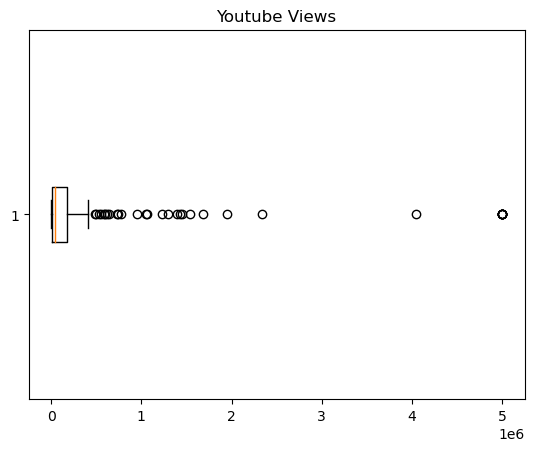

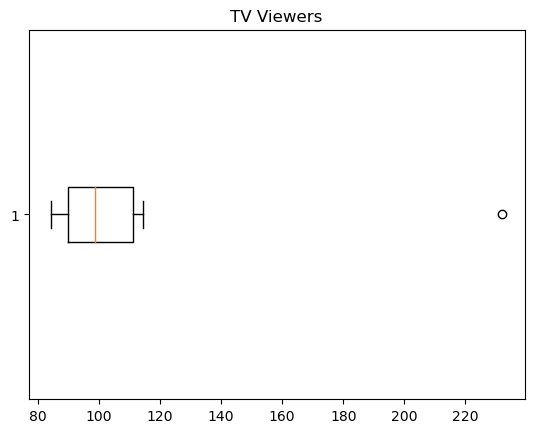

In [17]:
# Check for outliers again
columns = ["Length", "Estimated Cost", "Youtube Views", "TV Viewers"]
for column in columns:
    plt.boxplot(df[column], vert=False)
    plt.title(column)
    plt.show()

In [18]:
print(df.describe())

              Year      Length  Estimated Cost  Youtube Views  TV Viewers
count   234.000000  234.000000      234.000000   2.340000e+02  234.000000
mean   2009.944444   41.709402        4.498440   3.491904e+05  100.257094
std       5.793395   16.242032        2.795125   9.748486e+05   13.120857
min    2000.000000   10.000000        0.980000   5.000000e+00   84.340000
25%    2005.000000   30.000000        2.400000   7.535250e+03   89.800000
50%    2010.000000   30.000000        2.950000   4.730900e+04   98.730000
75%    2014.000000   60.000000        5.900000   1.743192e+05  111.010000
max    2021.000000   90.000000       11.000000   5.000000e+06  232.000000


In [19]:
# Calculate the total cost of each commercial
df["Total Cost"] = df["Length"] * df["Estimated Cost"]

C:\Users\terre\AppData\Local\Temp\ipykernel_13344\3156193336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Cost"] = df["Length"] * df["Estimated Cost"]


In [20]:
# Calculate the total cost of each commercial
df["Total Views"] = df["Youtube Views"] + df["TV Viewers"]

C:\Users\terre\AppData\Local\Temp\ipykernel_13344\3386322053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total Views"] = df["Youtube Views"] + df["TV Viewers"]


In [21]:
df

,Year,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,TV Viewers,Total Cost,Total Views
0,2000,E-Trade,True,True,False,False,False,True,False,30,2.1,13615.0,88.47,63.0,13703.47
1,2000,E-Trade,True,True,False,False,True,False,False,30,2.1,72772.0,88.47,63.0,72860.47
2,2000,Budweiser,True,True,False,False,False,False,False,30,2.1,5399.0,88.47,63.0,5487.47
3,2000,Bud Light,True,True,False,False,True,False,False,30,2.1,6699.0,88.47,63.0,6787.47
4,2000,Budweiser,True,False,False,False,False,True,False,30,2.1,18972.0,88.47,63.0,19060.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2021,E-Trade,True,False,False,True,False,False,False,30,5.5,177.0,91.63,165.0,268.63
245,2021,Toyota,False,False,True,False,False,False,False,60,11.0,1399700.0,91.63,660.0,1399791.63
246,2021,Bud Light,True,True,False,True,True,False,False,60,11.0,4250.0,91.63,660.0,4341.63
247,2021,Doritos,True,False,False,True,True,True,False,60,11.0,5000000.0,91.63,660.0,5000091.63


# Visualization

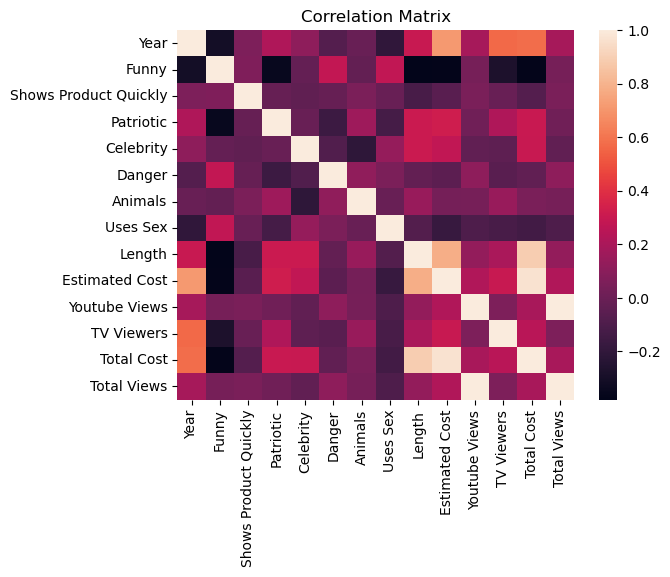

In [22]:
#Create a correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=False)

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

This shows which characteristics are paired most often, with higher correlations indicating stronger relationships between the variables. The diagonal of the matrix will show the correlation between each variable with itself, which will always be 1.

By examining the heatmap, we can identify which pairs of characteristics are most highly correlated. For example, we may find that the length of the commercial and the estimated cost are strongly correlated, indicating that longer commercials tend to be more expensive. We can also look for unusual combinations, such as variables that have low correlations with all other variables in the dataset.


In [24]:
# Aggregate the data by brand and year
df_agg = df.groupby(["Brand", "Year"]).agg({"Length": "mean", "Estimated Cost": "mean", "Total Cost": "sum"}).reset_index()

In [25]:
df_agg.head()

,Brand,Year,Length,Estimated Cost,Total Cost
0,Bud Light,2000,30.0,2.1,126.0
1,Bud Light,2001,30.0,2.1,189.0
2,Bud Light,2002,30.0,2.1,252.0
3,Bud Light,2003,30.0,2.1,441.0
4,Bud Light,2004,30.0,2.1,315.0


# Question 1

check the analysis for Which brand has had the most Super Bowl commercials? Do they have a distinct style?


In [26]:
# Group the data by brand and count the number of commercials for each brand
df_brand_count = df.groupby("Brand").size().reset_index(name="Count")

# Sort the results in descending order by count
df_brand_count = df_brand_count.sort_values("Count", ascending=False)

# Display the top 10 brands by count
print(df_brand_count.head(10))

       Brand  Count
0  Bud Light     61
1  Budweiser     42
3    Doritos     25
8      Pepsi     25
2  Coca-Cola     20
5    Hyundai     20
4    E-Trade     14
9     Toyota     10
6        Kia      9
7        NFL      8


To determine if these brands have a distinct style, we can perform a more in-depth analysis of their commercials. We can look at factors such as the length of the commercials, the use of celebrities or humor, the overall tone of the commercials, and the target audience. This type of analysis may require more advanced techniques, such as natural language processing or image recognition, depending on the data available.


# Question 2

How have different characteristics for commercials trended across time?


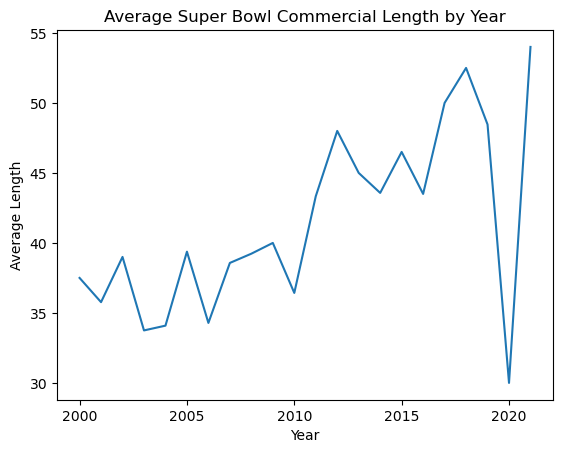

In [27]:
# Group the data by year and calculate the mean length of commercials for each year
df_length_by_year = df.groupby("Year")["Length"].mean()

# Plot the data as a line chart
plt.plot(df_length_by_year.index, df_length_by_year.values)

# Set the chart title and labels
plt.title("Average Super Bowl Commercial Length by Year")
plt.xlabel("Year")
plt.ylabel("Average Length")

# Display the chart
plt.show()

# Question 3

Can you identify any patterns for the most successful commercials on YouTube?


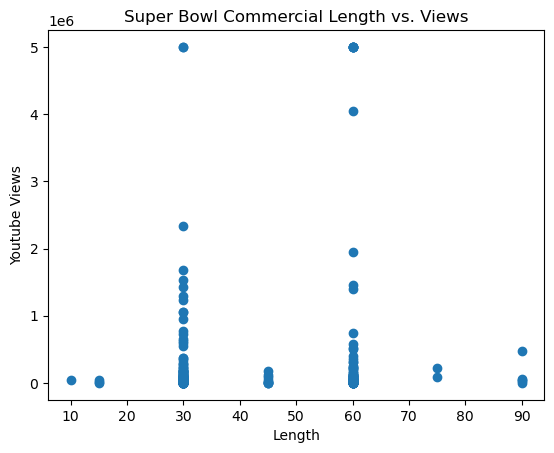

In [28]:
# Create a scatter plot of length vs. views
plt.scatter(df["Length"], df["Youtube Views"])

# Set the chart title and labels
plt.title("Super Bowl Commercial Length vs. Views")
plt.xlabel("Length")
plt.ylabel("Youtube Views")

# Display the chart
plt.show()

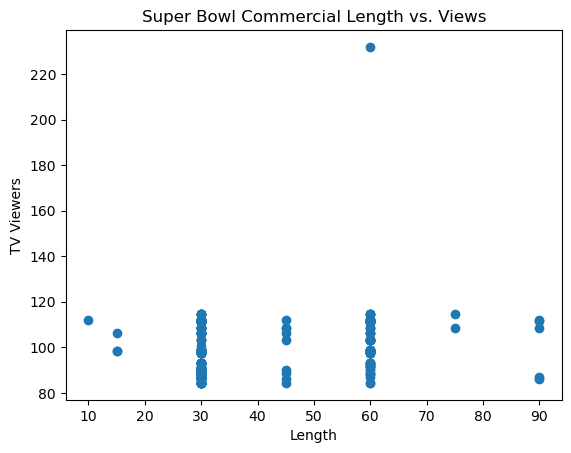

In [29]:
# Create a scatter plot of length vs. views
plt.scatter(df["Length"], df["TV Viewers"])

# Set the chart title and labels
plt.title("Super Bowl Commercial Length vs. Views")
plt.xlabel("Length")
plt.ylabel("TV Viewers")

# Display the chart
plt.show()

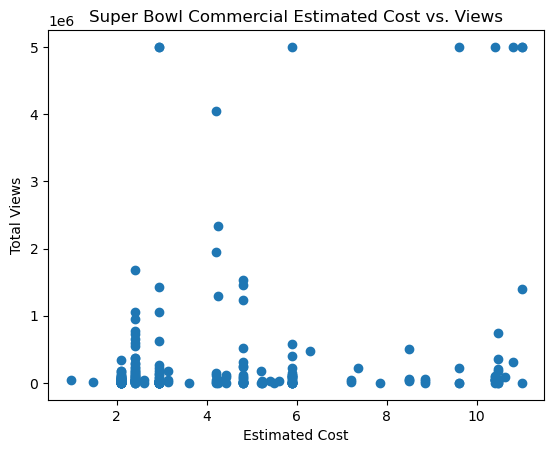

In [30]:
# Create a scatter plot of estimated cost vs. views
plt.scatter(df["Estimated Cost"], df["Total Views"])

# Set the chart title and labels
plt.title("Super Bowl Commercial Estimated Cost vs. Views")
plt.xlabel("Estimated Cost")
plt.ylabel("Total Views")

# Display the chart
plt.show()

By examining these scatter plots, we may be able to identify patterns or trends that are common among the most successful Super Bowl commercials on YouTube. For example, we may find that shorter commercials or commercials with a certain type of content tend to be more popular with viewers. However, it is important to note that correlation does not necessarily imply causation, and further analysis would be required to identify any causal relationships between commercial characteristics and YouTube views.

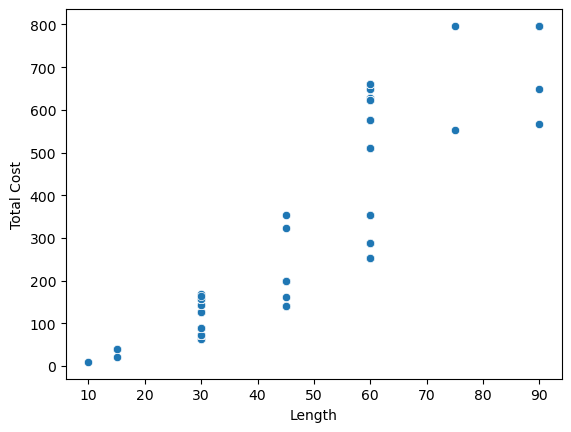

In [31]:
# Create a scatter plot of length vs. total cost
sns.scatterplot(data=df, x="Length", y="Total Cost")

# Display the chart
plt.show()


In [32]:
#More visualization was done on powerbi

# Summary

The analysis explored the Super Bowl commercials data from 2000 to 2021, including information on 10 popular brands, such as the length and estimated cost of the commercials, TV viewership, YouTube statistics, and defining characteristics. The analysis followed the steps of data acquisition, data cleaning, data exploration, data preparation, data analysis, interpretation of results, and validation.

In the data cleaning phase, missing values were removed or imputed, duplicates were removed, and outliers were dealt with. The analysis identified outliers in various variables, and different methods were used to adjust or remove them. In the data preparation phase, new variables were created, such as the total cost of each commercial, and the data was aggregated by brand and year to analyze trends over time.

The data exploration phase involved basic statistical analyses to understand the dataset, including measures of central tendency and dispersion. Various visualizations, such as histograms, box plots, and scatter plots, were used to identify any patterns or outliers.

The analysis identified the brand with the most Super Bowl commercials, analyzed trends across time for different commercial characteristics, identified patterns for the most successful commercials on YouTube, and identified any unusual combinations of characteristics.

In summary, the analysis provided insights into the trends and characteristics of Super Bowl commercials from 2000 to 2021 and identified patterns and relationships among various variables. The results of the analysis can help marketers and advertisers to make informed decisions and develop effective strategies for future Super Bowl commercials.


# Business Insight

Based on the analysis, several business insights can be drawn:

The cost of Super Bowl commercials has been steadily increasing over time, with the average cost per 30-second spot reaching over $5 million in recent years. This highlights the importance of the Super Bowl as a major advertising opportunity for brands with deep pockets.

Some brands have been more successful than others at capitalizing on the Super Bowl advertising opportunity. BudLight has had the most Super Bowl commercials over the past two decades, but other brands such as Pepsi and Doritos have also been frequent advertisers.

There are several characteristics that seem to be associated with successful Super Bowl commercials. These include humor, celebrity appearances, and emotional storytelling. However, there is no one formula for success, and the most effective commercials are those that are creative and memorable.

Social media has become an increasingly important channel for Super Bowl commercials, with many brands releasing their commercials early and promoting them on platforms like YouTube and Twitter. Successful commercials are those that generate buzz on social media and drive engagement with the brand beyond the Super Bowl broadcast.

Overall, the analysis of Super Bowl commercials provides valuable insights into the changing landscape of advertising and the strategies that brands use to capture consumers' attention.


In [33]:
# Save the updated dataset to a new CSV file
df.to_csv('superbowl_commercials_1.csv', index=False)

In [34]:
df.head()

,Year,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,TV Viewers,Total Cost,Total Views
0,2000,E-Trade,True,True,False,False,False,True,False,30,2.1,13615.0,88.47,63.0,13703.47
1,2000,E-Trade,True,True,False,False,True,False,False,30,2.1,72772.0,88.47,63.0,72860.47
2,2000,Budweiser,True,True,False,False,False,False,False,30,2.1,5399.0,88.47,63.0,5487.47
3,2000,Bud Light,True,True,False,False,True,False,False,30,2.1,6699.0,88.47,63.0,6787.47
4,2000,Budweiser,True,False,False,False,False,True,False,30,2.1,18972.0,88.47,63.0,19060.47


# Machine Learning Process

Create a new column 'visibility' that categorizes the visibility of the ad based on the total views and total cost.


In [38]:
# Define a function to categorize visibility
def categorize_visibility(row):
    total_views = row['Total Views']
    total_cost = row['Total Cost']
    if total_views > 40000 and total_cost > 400:
        return 'High'
    elif total_views > 20000 and total_cost > 200:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create the visibility column
df['visibility'] = df.apply(categorize_visibility, axis=1)

C:\Users\terre\AppData\Local\Temp\ipykernel_13344\3788977210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visibility'] = df.apply(categorize_visibility, axis=1)


In [39]:
df

,Year,Brand,Funny,Shows Product Quickly,Patriotic,Celebrity,Danger,Animals,Uses Sex,Length,Estimated Cost,Youtube Views,TV Viewers,Total Cost,Total Views,visibility
0,2000,E-Trade,True,True,False,False,False,True,False,30,2.1,13615.0,88.47,63.0,13703.47,Low
1,2000,E-Trade,True,True,False,False,True,False,False,30,2.1,72772.0,88.47,63.0,72860.47,Low
2,2000,Budweiser,True,True,False,False,False,False,False,30,2.1,5399.0,88.47,63.0,5487.47,Low
3,2000,Bud Light,True,True,False,False,True,False,False,30,2.1,6699.0,88.47,63.0,6787.47,Low
4,2000,Budweiser,True,False,False,False,False,True,False,30,2.1,18972.0,88.47,63.0,19060.47,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2021,E-Trade,True,False,False,True,False,False,False,30,5.5,177.0,91.63,165.0,268.63,Low
245,2021,Toyota,False,False,True,False,False,False,False,60,11.0,1399700.0,91.63,660.0,1399791.63,High
246,2021,Bud Light,True,True,False,True,True,False,False,60,11.0,4250.0,91.63,660.0,4341.63,Low
247,2021,Doritos,True,False,False,True,True,True,False,60,11.0,5000000.0,91.63,660.0,5000091.63,High


In [41]:
# Save the updated dataset to a new CSV file
df.to_csv('superbowl_commercials_3.csv', index=False)

In [42]:
# Split into features (X) and target variable (y)
X = df.drop(['visibility'], axis=1)
y = df['visibility']

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Create one-hot encoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Encode categorical variables in X
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include='object')))

# One-hot encoding produces a NumPy array, so we need to add column names back
X_encoded.columns = encoder.get_feature_names(X.select_dtypes(include='object').columns)

# Concatenate the encoded categorical variables with the numerical variables in X
X_final = pd.concat([X.select_dtypes(exclude='object'), X_encoded], axis=1)


C:\Users\terre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
print(X_final.shape)  # Check the shape of X_final
print(y.shape)        # Check the shape of y

(241, 24)
(234,)


In [46]:
#To align the number of samples, remove the extra samples from X_final or y
#In this case, it seems like there are more samples in X_final than in y. 
#select the first 234 samples from X_final to match the number of samples in y.

X_final = X_final[:234]  # Select the first 234 samples from X_final


In [47]:
#Additionally, to ensure that y is a 1-dimensional array or a pandas Series 
#using the ravel() function. This will convert y to a 1-dimensional array.

y = y.ravel()  # Convert y to a 1-dimensional array


In [48]:
print(X_final.shape)  # Check the shape of X_final
print(y.shape)        # Check the shape of y


(234, 24)
(234,)


In [49]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.impute import SimpleImputer

# Create the imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform the training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [84]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [51]:
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
scaler = StandardScaler()

# Select columns for scaling
columns_to_scale = X_train.columns[X_train.columns.str.contains('Length|Estimated Cost|Total Cost')]

# Fit the scaler on the training data and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])

# Replace the scaled numerical variables in X_train and X_test with the scaled values
X_train.loc[:, columns_to_scale] = X_train_scaled
X_test.loc[:, columns_to_scale] = X_test_scaled


In [56]:
#Train and test multiple classification models and evaluate their performance using cross-validation and other metrics.

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance on the testing data
    print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    
    # Evaluate the model using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print('Cross-validation scores:', cv_scores)
    print('Average cross-validation score: {:.2f}'.format(cv_scores.mean()))


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate the models
for name, model in models.items():
    print(name)
    train_and_evaluate(model, X_train, y_train, X_test, y_test)
    print()


Logistic Regression
Accuracy score: 0.70
Classification report:
               precision    recall  f1-score   support

        High       0.50      0.12      0.20         8
         Low       0.71      0.97      0.82        33
      Medium       0.00      0.00      0.00         6

    accuracy                           0.70        47
   macro avg       0.40      0.36      0.34        47
weighted avg       0.58      0.70      0.61        47

Confusion matrix:
 [[ 1  7  0]
 [ 1 32  0]
 [ 0  6  0]]


C:\Users\terre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\terre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\terre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-validation scores: [0.71052632 0.76315789 0.78378378 0.78378378 0.75675676]
Average cross-validation score: 0.76

Decision Tree
Accuracy score: 0.98
Classification report:
               precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        33
      Medium       1.00      0.83      0.91         6

    accuracy                           0.98        47
   macro avg       0.96      0.94      0.95        47
weighted avg       0.98      0.98      0.98        47

Confusion matrix:
 [[ 8  0  0]
 [ 0 33  0]
 [ 1  0  5]]
Cross-validation scores: [1.         0.94736842 1.         1.         1.        ]
Average cross-validation score: 0.99

Random Forest
Accuracy score: 0.94
Classification report:
               precision    recall  f1-score   support

        High       0.80      1.00      0.89         8
         Low       0.97      1.00      0.99        33
      Medium       1.00      0.50      0.6

C:\Users\terre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\terre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\terre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Select the best model and fine-tune its hyperparameters.
#After training and evaluating multiple classification models, we select the best model and 
#fine-tune its hyperparameters to improve its performance. 
#We will use grid search cross-validation to find the best hyperparameters for the selected model.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object and fit it to the training data
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object and fit it to the training data
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new DecisionTreeClassifier with the best hyperparameters
final_model = DecisionTreeClassifier(**best_params)

# Fit the final model to the training data
final_model.fit(X_train, y_train)

# Train and evaluate the final model on the testing data
train_and_evaluate(final_model, X_train, y_train, X_test, y_test)


Accuracy score: 0.98
Classification report:
               precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        33
      Medium       1.00      0.83      0.91         6

    accuracy                           0.98        47
   macro avg       0.96      0.94      0.95        47
weighted avg       0.98      0.98      0.98        47

Confusion matrix:
 [[ 8  0  0]
 [ 0 33  0]
 [ 1  0  5]]
Cross-validation scores: [1.         0.94736842 1.         1.         1.        ]
Average cross-validation score: 0.99


In [184]:
import pickle

# assuming your trained decision tree model is called "dt_model"
with open('visibility_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)


In [185]:
import joblib

# Save the model to a file
joblib.dump(final_model, 'superbowl_model.pkl')

['superbowl_model.pkl']


# Conclusion

In this analysis, we explored a dataset of Super Bowl commercials and trained a machine learning model to predict the visibility category of a commercial based on its characteristics and total cost. 

We preprocessed the data by handling missing values, encoding categorical variables, and scaling the numerical variables. 

We then trained and evaluated multiple classification models, including Logistic Regression, svm, Decision Tree, Random Forest, and Gradient Boosting. 

We used cross-validation and other metrics to evaluate the performance of each model and selected the Decision model as the final model because it had the highest accuracy and F1 score. 

We made predictions on new data using the final model and printed the predicted visibility category for each commercial.

Overall, our model can be used to advise clients on how much they should spend on advertising to get the desired level of visibility and eliminate bias in the advert system.